# Multi-layered Neural Network

In [1]:
# Settings
num_units1 = 8
num_units2 = 8

## Theory
- Previously, the calculation demonstrated that the hidden layer with multiple node can be used to divide the dataset into multiple region, and it is possible to draw curvy boundary line. However, this does not solve the problem that requires multiple line, or distanced dataset.
- One of the technique we can use is to double the layer of hidden layer, then it is possible to evaluate the properties of distinct regions seperately.
- Consider the following dataset:

## Prepare Dataset

In [2]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1','x2'])
    df['t'] = t
    return df

df0 = generate_datablock(30, [-7,-7], 18, 1)
df1 = generate_datablock(30, [-7,7], 18, 0)
df2 = generate_datablock(30, [7,-7], 18, 0)
df3 = generate_datablock(30, [7,7], 18, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [3]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

### Visualize Dataset

In [4]:
import matplotlib.pyplot as plt
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-15,15])
subplot.set_xlim([-15,15])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

- It is clear that the dataset in first and third quadrant cannot be distinguished with second and forth quadrant using single boundary.
- By adding more layer of node, it produces an effect of making different 'sections' as an input data, which can solve this problem.

## Model Implementation

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [6]:
# Build Layers
model = Sequential()
model.add(Dense(num_units1, input_dim = 2,
               activation = 'tanh',
               kernel_initializer='truncated_normal',
               bias_initializer='zeros'))
model.add(Dense(num_units2,
               activation = 'tanh',
               kernel_initializer='truncated_normal',
               bias_initializer='zeros'))
model.add(Dense(1,
                activation = 'sigmoid',
                kernel_initializer = 'zeros',
                bias_initializer = 'zeros'))

In [12]:
# Build Compiler
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [13]:
# Check Config
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'tanh',
   'activity_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'TruncatedNormal',
    'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 8,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'tanh',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'TruncatedNormal',
    'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
   'kernel_regularizer': None,
   'name': 'dense_2',
   'trainable': True,
   'units': 8,
   'use_bias': Tr

## Training

In [14]:
history = model.fit(train_x, train_t, epochs=2000, verbose=1)

Epoch 1/2000
120/120 [==============================] - 0s 4ms/step - loss: 0.0850 - acc: 0.9667
Epoch 2/2000
120/120 [==============================] - 0s 83us/step - loss: 0.0839 - acc: 0.9667
Epoch 3/2000
120/120 [==============================] - 0s 74us/step - loss: 0.0833 - acc: 0.9750
Epoch 4/2000
120/120 [==============================] - 0s 86us/step - loss: 0.0832 - acc: 0.9750
Epoch 5/2000
120/120 [==============================] - 0s 89us/step - loss: 0.0837 - acc: 0.9750
Epoch 6/2000
120/120 [==============================] - 0s 76us/step - loss: 0.0832 - acc: 0.9750
Epoch 7/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0834 - acc: 0.9750
Epoch 8/2000
120/120 [==============================] - 0s 88us/step - loss: 0.0839 - acc: 0.9750
Epoch 9/2000
120/120 [==============================] - 0s 78us/step - loss: 0.0835 - acc: 0.9750
Epoch 10/2000
120/120 [==============================] - 0s 94us/step - loss: 0.0832 - acc: 0.9750
Epoch 11/2000
120/12

120/120 [==============================] - 0s 98us/step - loss: 0.0826 - acc: 0.9750
Epoch 84/2000
120/120 [==============================] - 0s 95us/step - loss: 0.0829 - acc: 0.9750
Epoch 85/2000
120/120 [==============================] - 0s 94us/step - loss: 0.0825 - acc: 0.9750
Epoch 86/2000
120/120 [==============================] - 0s 85us/step - loss: 0.0832 - acc: 0.9750
Epoch 87/2000
120/120 [==============================] - 0s 101us/step - loss: 0.0826 - acc: 0.9750
Epoch 88/2000
120/120 [==============================] - 0s 101us/step - loss: 0.0825 - acc: 0.9750
Epoch 89/2000
120/120 [==============================] - 0s 101us/step - loss: 0.0826 - acc: 0.9750
Epoch 90/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0824 - acc: 0.9750
Epoch 91/2000
120/120 [==============================] - 0s 95us/step - loss: 0.0824 - acc: 0.9750
Epoch 92/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0823 - acc: 0.9750
Epoch 93/2000
120/120

120/120 [==============================] - 0s 90us/step - loss: 0.0815 - acc: 0.9750
Epoch 166/2000
120/120 [==============================] - 0s 99us/step - loss: 0.0815 - acc: 0.9750
Epoch 167/2000
120/120 [==============================] - 0s 85us/step - loss: 0.0817 - acc: 0.9750
Epoch 168/2000
120/120 [==============================] - 0s 78us/step - loss: 0.0816 - acc: 0.9750
Epoch 169/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0822 - acc: 0.9750
Epoch 170/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0815 - acc: 0.9750
Epoch 171/2000
120/120 [==============================] - 0s 91us/step - loss: 0.0816 - acc: 0.9750
Epoch 172/2000
120/120 [==============================] - 0s 82us/step - loss: 0.0816 - acc: 0.9750
Epoch 173/2000
120/120 [==============================] - 0s 103us/step - loss: 0.0819 - acc: 0.9750
Epoch 174/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0818 - acc: 0.9750
Epoch 175/2000

Epoch 247/2000
120/120 [==============================] - 0s 106us/step - loss: 0.0807 - acc: 0.9750
Epoch 248/2000
120/120 [==============================] - 0s 100us/step - loss: 0.0806 - acc: 0.9750
Epoch 249/2000
120/120 [==============================] - 0s 99us/step - loss: 0.0805 - acc: 0.9750
Epoch 250/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0810 - acc: 0.9750
Epoch 251/2000
120/120 [==============================] - 0s 88us/step - loss: 0.0809 - acc: 0.9750
Epoch 252/2000
120/120 [==============================] - 0s 119us/step - loss: 0.0811 - acc: 0.9750
Epoch 253/2000
120/120 [==============================] - 0s 105us/step - loss: 0.0805 - acc: 0.9750
Epoch 254/2000
120/120 [==============================] - 0s 100us/step - loss: 0.0809 - acc: 0.9750
Epoch 255/2000
120/120 [==============================] - 0s 95us/step - loss: 0.0805 - acc: 0.9750
Epoch 256/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0807 - acc: 0.

120/120 [==============================] - 0s 88us/step - loss: 0.0798 - acc: 0.9750
Epoch 329/2000
120/120 [==============================] - 0s 83us/step - loss: 0.0800 - acc: 0.9750
Epoch 330/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0798 - acc: 0.9750
Epoch 331/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0794 - acc: 0.9750
Epoch 332/2000
120/120 [==============================] - 0s 80us/step - loss: 0.0796 - acc: 0.9750
Epoch 333/2000
120/120 [==============================] - 0s 95us/step - loss: 0.0804 - acc: 0.9667
Epoch 334/2000
120/120 [==============================] - 0s 95us/step - loss: 0.0796 - acc: 0.9667
Epoch 335/2000
120/120 [==============================] - 0s 80us/step - loss: 0.0794 - acc: 0.9667
Epoch 336/2000
120/120 [==============================] - 0s 86us/step - loss: 0.0795 - acc: 0.9750
Epoch 337/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0795 - acc: 0.9750
Epoch 338/2000


120/120 [==============================] - 0s 76us/step - loss: 0.0783 - acc: 0.9750
Epoch 411/2000
120/120 [==============================] - 0s 81us/step - loss: 0.0783 - acc: 0.9750
Epoch 412/2000
120/120 [==============================] - 0s 89us/step - loss: 0.0784 - acc: 0.9750
Epoch 413/2000
120/120 [==============================] - 0s 86us/step - loss: 0.0786 - acc: 0.9750
Epoch 414/2000
120/120 [==============================] - 0s 80us/step - loss: 0.0782 - acc: 0.9750
Epoch 415/2000
120/120 [==============================] - 0s 85us/step - loss: 0.0782 - acc: 0.9750
Epoch 416/2000
120/120 [==============================] - 0s 72us/step - loss: 0.0780 - acc: 0.9750
Epoch 417/2000
120/120 [==============================] - 0s 85us/step - loss: 0.0783 - acc: 0.9750
Epoch 418/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0781 - acc: 0.9750
Epoch 419/2000
120/120 [==============================] - 0s 76us/step - loss: 0.0781 - acc: 0.9750
Epoch 420/2000


120/120 [==============================] - 0s 93us/step - loss: 0.0766 - acc: 0.9750
Epoch 493/2000
120/120 [==============================] - 0s 79us/step - loss: 0.0764 - acc: 0.9750
Epoch 494/2000
120/120 [==============================] - 0s 80us/step - loss: 0.0767 - acc: 0.9750
Epoch 495/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0765 - acc: 0.9750
Epoch 496/2000
120/120 [==============================] - 0s 73us/step - loss: 0.0765 - acc: 0.9667
Epoch 497/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0765 - acc: 0.9750
Epoch 498/2000
120/120 [==============================] - 0s 85us/step - loss: 0.0765 - acc: 0.9750
Epoch 499/2000
120/120 [==============================] - 0s 77us/step - loss: 0.0764 - acc: 0.9750
Epoch 500/2000
120/120 [==============================] - 0s 84us/step - loss: 0.0773 - acc: 0.9750
Epoch 501/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0783 - acc: 0.9750
Epoch 502/2000


120/120 [==============================] - 0s 73us/step - loss: 0.0763 - acc: 0.9667
Epoch 574/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0754 - acc: 0.9667
Epoch 575/2000
120/120 [==============================] - 0s 97us/step - loss: 0.0752 - acc: 0.9750
Epoch 576/2000
120/120 [==============================] - 0s 75us/step - loss: 0.0754 - acc: 0.9750
Epoch 577/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0751 - acc: 0.9667
Epoch 578/2000
120/120 [==============================] - 0s 85us/step - loss: 0.0751 - acc: 0.9667
Epoch 579/2000
120/120 [==============================] - 0s 75us/step - loss: 0.0756 - acc: 0.9667
Epoch 580/2000
120/120 [==============================] - 0s 85us/step - loss: 0.0756 - acc: 0.9750
Epoch 581/2000
120/120 [==============================] - 0s 86us/step - loss: 0.0756 - acc: 0.9750
Epoch 582/2000
120/120 [==============================] - 0s 78us/step - loss: 0.0755 - acc: 0.9750
Epoch 583/2000


120/120 [==============================] - 0s 80us/step - loss: 0.0745 - acc: 0.9667
Epoch 655/2000
120/120 [==============================] - 0s 97us/step - loss: 0.0741 - acc: 0.9667
Epoch 656/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0738 - acc: 0.9750
Epoch 657/2000
120/120 [==============================] - 0s 80us/step - loss: 0.0739 - acc: 0.9750
Epoch 658/2000
120/120 [==============================] - 0s 94us/step - loss: 0.0738 - acc: 0.9750
Epoch 659/2000
120/120 [==============================] - 0s 89us/step - loss: 0.0739 - acc: 0.9667
Epoch 660/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0738 - acc: 0.9667
Epoch 661/2000
120/120 [==============================] - 0s 98us/step - loss: 0.0738 - acc: 0.9667
Epoch 662/2000
120/120 [==============================] - 0s 114us/step - loss: 0.0737 - acc: 0.9667
Epoch 663/2000
120/120 [==============================] - 0s 83us/step - loss: 0.0734 - acc: 0.9667
Epoch 664/2000

120/120 [==============================] - 0s 73us/step - loss: 0.0733 - acc: 0.9750
Epoch 737/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0738 - acc: 0.9750
Epoch 738/2000
120/120 [==============================] - 0s 80us/step - loss: 0.0730 - acc: 0.9750
Epoch 739/2000
120/120 [==============================] - 0s 73us/step - loss: 0.0726 - acc: 0.9750
Epoch 740/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0728 - acc: 0.9667
Epoch 741/2000
120/120 [==============================] - 0s 83us/step - loss: 0.0726 - acc: 0.9667
Epoch 742/2000
120/120 [==============================] - 0s 78us/step - loss: 0.0726 - acc: 0.9750
Epoch 743/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0727 - acc: 0.9750
Epoch 744/2000
120/120 [==============================] - 0s 88us/step - loss: 0.0732 - acc: 0.9750
Epoch 745/2000
120/120 [==============================] - 0s 78us/step - loss: 0.0730 - acc: 0.9750
Epoch 746/2000


Epoch 818/2000
120/120 [==============================] - 0s 104us/step - loss: 0.0706 - acc: 0.9750
Epoch 819/2000
120/120 [==============================] - 0s 84us/step - loss: 0.0706 - acc: 0.9750
Epoch 820/2000
120/120 [==============================] - 0s 72us/step - loss: 0.0711 - acc: 0.9750
Epoch 821/2000
120/120 [==============================] - 0s 118us/step - loss: 0.0710 - acc: 0.9750
Epoch 822/2000
120/120 [==============================] - 0s 118us/step - loss: 0.0706 - acc: 0.9750
Epoch 823/2000
120/120 [==============================] - 0s 103us/step - loss: 0.0707 - acc: 0.9667
Epoch 824/2000
120/120 [==============================] - 0s 98us/step - loss: 0.0708 - acc: 0.9667
Epoch 825/2000
120/120 [==============================] - 0s 82us/step - loss: 0.0708 - acc: 0.9667
Epoch 826/2000
120/120 [==============================] - 0s 100us/step - loss: 0.0708 - acc: 0.9667
Epoch 827/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0704 - acc: 0.

120/120 [==============================] - 0s 90us/step - loss: 0.0699 - acc: 0.9667
Epoch 900/2000
120/120 [==============================] - 0s 94us/step - loss: 0.0699 - acc: 0.9750
Epoch 901/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0699 - acc: 0.9750
Epoch 902/2000
120/120 [==============================] - 0s 108us/step - loss: 0.0698 - acc: 0.9750
Epoch 903/2000
120/120 [==============================] - 0s 108us/step - loss: 0.0699 - acc: 0.9667
Epoch 904/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0713 - acc: 0.9667
Epoch 905/2000
120/120 [==============================] - 0s 94us/step - loss: 0.0700 - acc: 0.9667
Epoch 906/2000
120/120 [==============================] - 0s 89us/step - loss: 0.0702 - acc: 0.9667
Epoch 907/2000
120/120 [==============================] - 0s 84us/step - loss: 0.0697 - acc: 0.9750
Epoch 908/2000
120/120 [==============================] - 0s 95us/step - loss: 0.0696 - acc: 0.9750
Epoch 909/200

Epoch 981/2000
120/120 [==============================] - 0s 75us/step - loss: 0.0690 - acc: 0.9750
Epoch 982/2000
120/120 [==============================] - 0s 77us/step - loss: 0.0697 - acc: 0.9750
Epoch 983/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0696 - acc: 0.9750
Epoch 984/2000
120/120 [==============================] - 0s 76us/step - loss: 0.0691 - acc: 0.9750
Epoch 985/2000
120/120 [==============================] - 0s 89us/step - loss: 0.0694 - acc: 0.9750
Epoch 986/2000
120/120 [==============================] - 0s 99us/step - loss: 0.0691 - acc: 0.9667
Epoch 987/2000
120/120 [==============================] - 0s 108us/step - loss: 0.0695 - acc: 0.9667
Epoch 988/2000
120/120 [==============================] - 0s 103us/step - loss: 0.0694 - acc: 0.9667
Epoch 989/2000
120/120 [==============================] - 0s 88us/step - loss: 0.0691 - acc: 0.9667
Epoch 990/2000
120/120 [==============================] - 0s 100us/step - loss: 0.0692 - acc: 0.96

120/120 [==============================] - 0s 86us/step - loss: 0.0690 - acc: 0.9750
Epoch 1063/2000
120/120 [==============================] - 0s 76us/step - loss: 0.0692 - acc: 0.9667
Epoch 1064/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0690 - acc: 0.9667
Epoch 1065/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0688 - acc: 0.9750
Epoch 1066/2000
120/120 [==============================] - 0s 76us/step - loss: 0.0686 - acc: 0.9750
Epoch 1067/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0691 - acc: 0.9667
Epoch 1068/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0693 - acc: 0.9667
Epoch 1069/2000
120/120 [==============================] - 0s 75us/step - loss: 0.0688 - acc: 0.9667
Epoch 1070/2000
120/120 [==============================] - 0s 100us/step - loss: 0.0686 - acc: 0.9667
Epoch 1071/2000
120/120 [==============================] - 0s 100us/step - loss: 0.0691 - acc: 0.9667
Epoc

120/120 [==============================] - 0s 93us/step - loss: 0.0692 - acc: 0.9667
Epoch 1144/2000
120/120 [==============================] - 0s 84us/step - loss: 0.0683 - acc: 0.9667
Epoch 1145/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0686 - acc: 0.9667
Epoch 1146/2000
120/120 [==============================] - 0s 97us/step - loss: 0.0686 - acc: 0.9667
Epoch 1147/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0679 - acc: 0.9750
Epoch 1148/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0682 - acc: 0.9750
Epoch 1149/2000
120/120 [==============================] - 0s 88us/step - loss: 0.0692 - acc: 0.9750
Epoch 1150/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0694 - acc: 0.9750
Epoch 1151/2000
120/120 [==============================] - 0s 86us/step - loss: 0.0683 - acc: 0.9750
Epoch 1152/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0683 - acc: 0.9750
Epoch 

120/120 [==============================] - 0s 91us/step - loss: 0.0684 - acc: 0.9667
Epoch 1225/2000
120/120 [==============================] - 0s 77us/step - loss: 0.0683 - acc: 0.9667
Epoch 1226/2000
120/120 [==============================] - 0s 82us/step - loss: 0.0681 - acc: 0.9667
Epoch 1227/2000
120/120 [==============================] - 0s 83us/step - loss: 0.0685 - acc: 0.9667
Epoch 1228/2000
120/120 [==============================] - 0s 74us/step - loss: 0.0693 - acc: 0.9667
Epoch 1229/2000
120/120 [==============================] - 0s 91us/step - loss: 0.0679 - acc: 0.9750
Epoch 1230/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0687 - acc: 0.9750
Epoch 1231/2000
120/120 [==============================] - 0s 67us/step - loss: 0.0680 - acc: 0.9750
Epoch 1232/2000
120/120 [==============================] - 0s 88us/step - loss: 0.0680 - acc: 0.9750
Epoch 1233/2000
120/120 [==============================] - 0s 83us/step - loss: 0.0684 - acc: 0.9750
Epoch 

120/120 [==============================] - 0s 96us/step - loss: 0.0677 - acc: 0.9750
Epoch 1306/2000
120/120 [==============================] - 0s 97us/step - loss: 0.0679 - acc: 0.9750
Epoch 1307/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0682 - acc: 0.9750
Epoch 1308/2000
120/120 [==============================] - 0s 85us/step - loss: 0.0678 - acc: 0.9667
Epoch 1309/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0677 - acc: 0.9667
Epoch 1310/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0691 - acc: 0.9750
Epoch 1311/2000
120/120 [==============================] - 0s 83us/step - loss: 0.0677 - acc: 0.9750
Epoch 1312/2000
120/120 [==============================] - 0s 89us/step - loss: 0.0678 - acc: 0.9750
Epoch 1313/2000
120/120 [==============================] - 0s 91us/step - loss: 0.0677 - acc: 0.9750
Epoch 1314/2000
120/120 [==============================] - 0s 79us/step - loss: 0.0683 - acc: 0.9750
Epoch 

120/120 [==============================] - 0s 95us/step - loss: 0.0675 - acc: 0.9750
Epoch 1387/2000
120/120 [==============================] - 0s 99us/step - loss: 0.0673 - acc: 0.9667
Epoch 1388/2000
120/120 [==============================] - 0s 82us/step - loss: 0.0675 - acc: 0.9667
Epoch 1389/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0674 - acc: 0.9667
Epoch 1390/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0675 - acc: 0.9667
Epoch 1391/2000
120/120 [==============================] - 0s 80us/step - loss: 0.0675 - acc: 0.9750
Epoch 1392/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0677 - acc: 0.9750
Epoch 1393/2000
120/120 [==============================] - 0s 99us/step - loss: 0.0678 - acc: 0.9750
Epoch 1394/2000
120/120 [==============================] - 0s 81us/step - loss: 0.0674 - acc: 0.9667
Epoch 1395/2000
120/120 [==============================] - 0s 79us/step - loss: 0.0683 - acc: 0.9750
Epoch 

120/120 [==============================] - 0s 94us/step - loss: 0.0673 - acc: 0.9750
Epoch 1468/2000
120/120 [==============================] - 0s 80us/step - loss: 0.0671 - acc: 0.9750
Epoch 1469/2000
120/120 [==============================] - 0s 80us/step - loss: 0.0673 - acc: 0.9750
Epoch 1470/2000
120/120 [==============================] - 0s 97us/step - loss: 0.0685 - acc: 0.9750
Epoch 1471/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0686 - acc: 0.9750
Epoch 1472/2000
120/120 [==============================] - 0s 71us/step - loss: 0.0674 - acc: 0.9750
Epoch 1473/2000
120/120 [==============================] - 0s 100us/step - loss: 0.0680 - acc: 0.9750
Epoch 1474/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0677 - acc: 0.9667
Epoch 1475/2000
120/120 [==============================] - 0s 72us/step - loss: 0.0672 - acc: 0.9667
Epoch 1476/2000
120/120 [==============================] - 0s 76us/step - loss: 0.0670 - acc: 0.9750
Epoch

120/120 [==============================] - 0s 108us/step - loss: 0.0672 - acc: 0.9750
Epoch 1549/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0671 - acc: 0.9667
Epoch 1550/2000
120/120 [==============================] - 0s 85us/step - loss: 0.0676 - acc: 0.9667
Epoch 1551/2000
120/120 [==============================] - 0s 91us/step - loss: 0.0670 - acc: 0.9750
Epoch 1552/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0669 - acc: 0.9667
Epoch 1553/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0670 - acc: 0.9750
Epoch 1554/2000
120/120 [==============================] - 0s 79us/step - loss: 0.0670 - acc: 0.9750
Epoch 1555/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0671 - acc: 0.9750
Epoch 1556/2000
120/120 [==============================] - 0s 91us/step - loss: 0.0669 - acc: 0.9750
Epoch 1557/2000
120/120 [==============================] - 0s 76us/step - loss: 0.0673 - acc: 0.9667
Epoch

120/120 [==============================] - 0s 78us/step - loss: 0.0678 - acc: 0.9750
Epoch 1630/2000
120/120 [==============================] - 0s 97us/step - loss: 0.0677 - acc: 0.9750
Epoch 1631/2000
120/120 [==============================] - 0s 95us/step - loss: 0.0666 - acc: 0.9750
Epoch 1632/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0678 - acc: 0.9667
Epoch 1633/2000
120/120 [==============================] - 0s 83us/step - loss: 0.0666 - acc: 0.9667
Epoch 1634/2000
120/120 [==============================] - 0s 100us/step - loss: 0.0666 - acc: 0.9667
Epoch 1635/2000
120/120 [==============================] - 0s 88us/step - loss: 0.0672 - acc: 0.9667
Epoch 1636/2000
120/120 [==============================] - 0s 82us/step - loss: 0.0666 - acc: 0.9750
Epoch 1637/2000
120/120 [==============================] - 0s 98us/step - loss: 0.0670 - acc: 0.9750
Epoch 1638/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0668 - acc: 0.9750
Epoch

120/120 [==============================] - 0s 74us/step - loss: 0.0664 - acc: 0.9667
Epoch 1711/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0670 - acc: 0.9750
Epoch 1712/2000
120/120 [==============================] - 0s 91us/step - loss: 0.0677 - acc: 0.9750
Epoch 1713/2000
120/120 [==============================] - 0s 100us/step - loss: 0.0672 - acc: 0.9750
Epoch 1714/2000
120/120 [==============================] - 0s 89us/step - loss: 0.0664 - acc: 0.9750
Epoch 1715/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0665 - acc: 0.9750
Epoch 1716/2000
120/120 [==============================] - 0s 94us/step - loss: 0.0666 - acc: 0.9750
Epoch 1717/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0671 - acc: 0.9667
Epoch 1718/2000
120/120 [==============================] - 0s 77us/step - loss: 0.0666 - acc: 0.9667
Epoch 1719/2000
120/120 [==============================] - 0s 88us/step - loss: 0.0683 - acc: 0.9667
Epoch

120/120 [==============================] - 0s 78us/step - loss: 0.0668 - acc: 0.9750
Epoch 1792/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0666 - acc: 0.9750
Epoch 1793/2000
120/120 [==============================] - 0s 93us/step - loss: 0.0662 - acc: 0.9750
Epoch 1794/2000
120/120 [==============================] - 0s 79us/step - loss: 0.0663 - acc: 0.9667
Epoch 1795/2000
120/120 [==============================] - 0s 91us/step - loss: 0.0672 - acc: 0.9667
Epoch 1796/2000
120/120 [==============================] - 0s 81us/step - loss: 0.0665 - acc: 0.9667
Epoch 1797/2000
120/120 [==============================] - 0s 72us/step - loss: 0.0665 - acc: 0.9667
Epoch 1798/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0664 - acc: 0.9750
Epoch 1799/2000
120/120 [==============================] - 0s 73us/step - loss: 0.0664 - acc: 0.9750
Epoch 1800/2000
120/120 [==============================] - 0s 81us/step - loss: 0.0665 - acc: 0.9750
Epoch 

120/120 [==============================] - 0s 94us/step - loss: 0.0661 - acc: 0.9667
Epoch 1872/2000
120/120 [==============================] - 0s 90us/step - loss: 0.0660 - acc: 0.9667
Epoch 1873/2000
120/120 [==============================] - 0s 75us/step - loss: 0.0662 - acc: 0.9667
Epoch 1874/2000
120/120 [==============================] - 0s 97us/step - loss: 0.0662 - acc: 0.9667
Epoch 1875/2000
120/120 [==============================] - 0s 88us/step - loss: 0.0664 - acc: 0.9750
Epoch 1876/2000
120/120 [==============================] - 0s 79us/step - loss: 0.0666 - acc: 0.9750
Epoch 1877/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0674 - acc: 0.9750
Epoch 1878/2000
120/120 [==============================] - 0s 92us/step - loss: 0.0664 - acc: 0.9750
Epoch 1879/2000
120/120 [==============================] - 0s 75us/step - loss: 0.0670 - acc: 0.9750
Epoch 1880/2000
120/120 [==============================] - 0s 95us/step - loss: 0.0676 - acc: 0.9750
Epoch 

120/120 [==============================] - 0s 97us/step - loss: 0.0664 - acc: 0.9667
Epoch 1953/2000
120/120 [==============================] - 0s 84us/step - loss: 0.0661 - acc: 0.9667
Epoch 1954/2000
120/120 [==============================] - 0s 94us/step - loss: 0.0676 - acc: 0.9667
Epoch 1955/2000
120/120 [==============================] - 0s 98us/step - loss: 0.0664 - acc: 0.9750
Epoch 1956/2000
120/120 [==============================] - 0s 101us/step - loss: 0.0658 - acc: 0.9750
Epoch 1957/2000
120/120 [==============================] - 0s 85us/step - loss: 0.0669 - acc: 0.9667
Epoch 1958/2000
120/120 [==============================] - 0s 102us/step - loss: 0.0666 - acc: 0.9750
Epoch 1959/2000
120/120 [==============================] - 0s 107us/step - loss: 0.0666 - acc: 0.9750
Epoch 1960/2000
120/120 [==============================] - 0s 96us/step - loss: 0.0670 - acc: 0.9750
Epoch 1961/2000
120/120 [==============================] - 0s 87us/step - loss: 0.0673 - acc: 0.9667
Epo

## Result

In [15]:
model.get_weights()
result = model.evaluate(train_x, train_t, verbose=0)
print('loss:', result[0], 'accuracy:', result[1])

loss: 0.0656007503469785 accuracy: 0.975


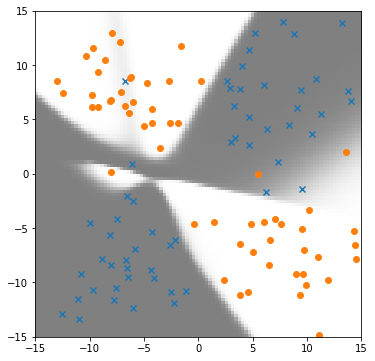

In [16]:
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([-15,15])
subplot.set_xlim([-15,15])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = []
for x2 in np.linspace(-15,15,100):
    for x1 in np.linspace(-15,15,100):
        locations.append((x1,x2))
        
p_vals = model.predict(np.array(locations))
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(-15,15,-15,15),
               cmap=plt.cm.gray_r, alpha=0.5)